# <font color='darkorange'> Quarteto de Anscombe
## A Importância da Visualização de Dados!</font>

In [1]:
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt

from sklearn.metrics      import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Load data from seaborn
data = sns.load_dataset("anscombe")
data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
def anscombe_statics(df):
    results = []
    
    for set_ in df.dataset.unique():
        dataset = df[df['dataset'] == set_]
        x = dataset['x'].values.reshape(-1, 1)
        y = dataset['y'].values
        
        lm = LinearRegression()
        lm.fit(x, y)
        
        results.append({
            'Set': set_,
            'Intercept': lm.intercept_,
            'Coef': lm.coef_[0],
            'r2': r2_score(y, lm.predict(x)),
            'pearson': dataset[['x', 'y']].corr().values[0, 1],
            'Mean_X': np.mean(dataset['x']),
            'Variance_X': np.var(dataset['x']),
            'Mean_Y': np.mean(dataset['y']),
            'Variance_Y': np.var(dataset['y'])
        })
    
    return np.round(pd.DataFrame(results),2)

info = anscombe_statics(data)
info

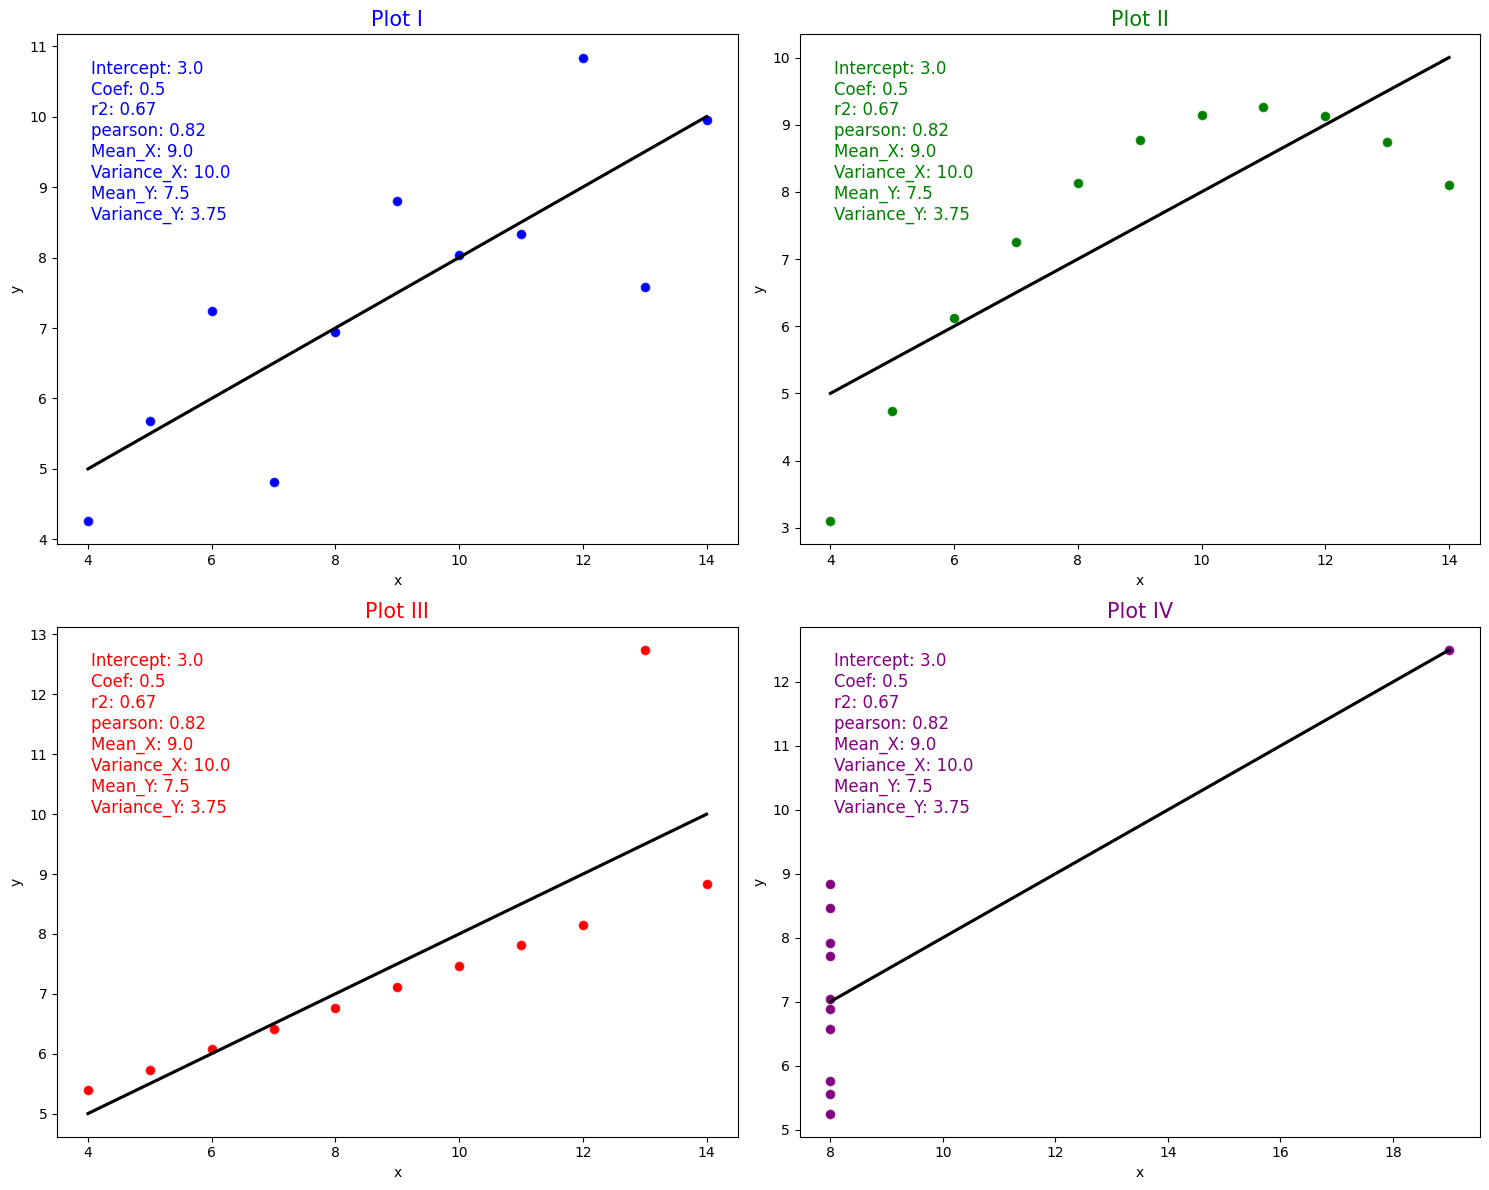

In [ ]:
colors = ['blue', 'green', 'red', 'purple']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for idx, set_ in enumerate(data.dataset.unique()):
    dataset = data.query('dataset == @set_')

    ax = axes[idx // 2, idx % 2]

    sns.scatterplot(x=dataset['x'], y=dataset['y'], ax=ax, color=colors[idx])
    sns.regplot(x=dataset['x'], y=dataset['y'], ax=ax, ci=0, scatter_kws={'color': colors[idx]}, line_kws={'color': 'black'})
    infos = info[info['Set'] == set_]
    text = ''
    for col in info.columns[1:]:
        text += f'\n{col}: {round(infos[col].values[0], 2)}'
    ax.set_title(f'Plot {infos["Set"].values[0]}', fontsize=15, color=colors[idx])
    ax.annotate(text.strip(), xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=12, color=colors[idx])

plt.tight_layout()
plt.show()